<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/CNN_CIFAR_10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discente: Lucas Rabelo

# CIFAR-10 Dataset



O conjunto de dados CIFAR-10 consiste em um total de 60.000 imagens coloridas de baixa resolução, distribuídas em 10 classes distintas. Cada imagem tem dimensões de 32x32 pixels, totalizando 1.024 pixels por imagem. Essas 60.000 imagens são divididas em dois conjuntos: 50.000 para treinamento e 10.000 para teste. Cada uma das 10 classes contém 5.000 imagens de treinamento e 1.000 imagens de teste. As classes do CIFAR-10 representam categorias amplas, incluindo objetos do mundo real como carros, aviões, gatos, cachorros, entre outros. Este conjunto de dados é frequentemente usado como um benchmark para avaliar algoritmos de aprendizado de máquina e redes neurais convolucionais em tarefas de classificação de imagens. É um dos conjuntos de dados mais populares na área de visão computacional e aprendizado profundo.




O significado de cada Label também está na figura abaixo:

<img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="width: 600px;">

A primeira etapa é similar ao notebook da FeedForward NN, onde os dados são separados em 80% treinamento e 20% teste

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.datasets
from sklearn.model_selection import train_test_split
import numpy as np





(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.cifar10.load_data()
X = np.concatenate([x_train, x_valid],axis=0)
y = np.concatenate([y_train, y_valid],axis=0)

# Divisão 80 - 20

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=11) # random_state permite controlar a aleatoriedade e tornar o código mais previsível e reprodutível.

170498071/170498071 [==============================] - 14s 0us/step


O Estado aleatório é o mesmo, para garantir que o modelo feedforward nn e a cnn estão recebendo a mesma entrada.

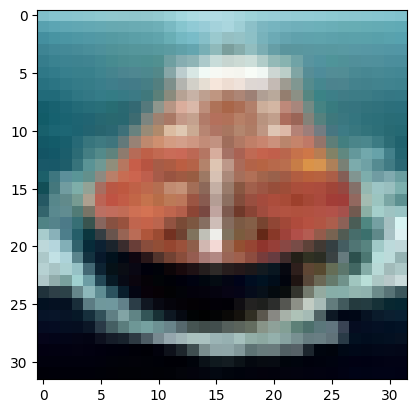

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image)#boat


In [ ]:
print(y_train[0])# Barco

[8]


### Pré-Processamento



A Normalização é aplicada, no entanto não existe a necessidade de realizar o flattening no pré-processamento, já que a rede cnn aceita a entrada em tensores


In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

Categorical Enconding (Ortogonalização) é aplicada nas labels

In [ ]:
y_train

array([[8],
       [6],
       [6],
       ...,
       [9],
       [3],
       [3]], dtype=uint8)

In [ ]:
import tensorflow.keras as keras
num_categories = 10 # categorias de 0 a 9

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Construindo o modelo

Primeiramente é adicionada uma camada convolucional (Conv2d) ao modelo, com filtros de janelas 3x3 e volume de 32, o stride selecionado é de 1 (ou seja o filtro é aplicado pulando apenas uma  coluna de pixel), o parametro padding é "same" ou seja a reolução da imagem será mantida durante a aplicação da camada convolucional.

A camada de MaxPooling2d 2x2 com stride 2 diminui a resolução da imagem pela metade (no final teremos a matriz de 8x8, lembrando que iniciamos com 32x32), tornando o modelo mais robusto e dinâmico

Antes da camada Fully Connected é aplicada uma cada de Flatten para que as operações sejam realizadas pela camada fully connected (seguindo a mesma lógica do flattening na feedforward do script anterior)

As camadas de normalização (BatchNormalization) aplicam a normalização dentro do modelo e a camada de Dropout desliga algumas conexões da camada anterior, na arquitetura escolhida foram aplicadas duas camadas de dropout desligando aleatoriamente 25% das conexões das camadas antecessoras


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', padding="same", input_shape=(32,32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(420, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


### Sumário do Modelo (Será comentado no final junto com a performance e comparação com o modelo do primeiro script)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9

### Ajuste do modelo

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1500/1500 [==============================] - 20s 6ms/step - loss: 1.4056 - accuracy: 0.5001 - val_loss: 1.4321 - val_accuracy: 0.5116
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0496 - accuracy: 0.6333 - val_loss: 1.0007 - val_accuracy: 0.6513
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9235 - accuracy: 0.6818 - val_loss: 1.0173 - val_accuracy: 0.6436
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8524 - accuracy: 0.7099 - val_loss: 0.9472 - val_accuracy: 0.6743
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7997 - accuracy: 0.7309 - val_loss: 0.9057 - val_accuracy: 0.6917
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7712 - accuracy: 0.7413 - val_loss: 0.9644 - val_accuracy: 0.6938
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7411 - accuracy: 0.7499 - val_loss: 1.0019 - val_accuracy


A Acurácia no conjunto de treinamento começa em torno de 50.01% e aumenta para cerca de 78.02% após 10 épocas. Isso indica que o modelo está aprendendo bem os padrões nos dados de treinamento, visto que a loss também diminui ao longo das épocas, indicando que o modelo está otimizando seus pesos para se ajustar melhor aos dados de treinamento.

Já no conjunto de validação a acurácia começa em torno de 51.16% e aumenta para cerca de 71.14% após 10 épocas. Mostrando que o modelo está generalizando bem e evitando overfitting. A loss no conjunto de validação também diminui de forma constante, o que é positivo, pois mostra que o modelo está melhorando sua capacidade de generalização.


## Discussão do Sumário do modelo (Comparação com FeedForward NN)

Este modelo tem consideravelmente menos parâmetros (cerca de 884.310) em comparação com o modelo anterior (aproximadamente 1.471.690). A redução na quantidade de parâmetros pode tornar o modelo menos propenso ao overfitting, a adição de camadas de Batch Normalization e Dropout também contribui para a regularização e pode ajudar a controlar o overfitting (possivelmente verificado no modelo anterior).

No geral, esse modelo parece ser mais eficiente em termos de parâmetros (houve uma diminuição de 39% no número de parâmetros em comparação a Rede Neural Simples e possui componentes de regularização que podem melhorar o desempenho em relação ao modelo anterior.

## Discussão da performance do modelo (Comparação com FeedForward NN)


Este modelo CNN parece ser mais eficaz, com uma acurácia de validação mais alta em comparação com o modelo feedforward anterior, que estava sofrendo de overfitting. A introdução de camadas convolucionais, max-pooling e dropout, com uma arquitetura de CNN, parece ter sido mais apropriada para previsão, visto que o número de neurônios da camada fully connected do modelo foi o mesmo (420 neurônios) para os dois modelos

Apesar do desempenho do modelo CNN poder ser ainda mais otimizado, a acurácia no conjunto de validação sugere que o modelo está generalizando bem para dados não vistos.

